<a href="https://colab.research.google.com/github/q-viper/SmogDetection/blob/master/keras_Smog4000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmogDetection using Smog4000 Dataset
## Contributors:
* Members of Udacity's Secure and Private AI Challange Scholarship


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [0]:
zip_url = 'https://storage.googleapis.com/kaggle-datasets/291231/597987/smog4000.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566091548&Signature=JG0KwUff2yNTfRsbAPqfqCUNGX%2F8BR984ETNOLPn6KORMrPMNRh4eEdyUvMsPXgwe0rDxThbGyLE93sDevYhyieqGJs6JwB8s9LPB56AYhk8WgCeyGIRPY1AAN093sdJvNcD%2FasbMOakzABA4PD19%2BKohx1GlJFct06cbAA1pK0XUWOSKqM0Y9vyF2DuZRSMRs3tCNk%2FN0AEGtF36hi7%2B0xJixU4JULVnucRkhbCJm8m2x2jxGlq1Dnv2k08J8FEU%2Fky%2FYuxMF8GyIWIFSy2geKTIxcRtHQj%2BXFafBW2ECTTu3%2BNeMETLEht55ULxnBtaOtYz6RedQgunEkcjebooA%3D%3D'
zipresp = urlopen(zip_url)
    # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb")
 # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read())
    # Close the newly-created file
tempzip.close()
    # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip")
    # Extract its contents into <extraction_path>
    # note that extractall will automatically create the path
zf.extractall(path = '<extraction_path>')
    # close the ZipFile instance
zf.close()


In [13]:
S = 224


trainDatagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

testDatagen = ImageDataGenerator(rescale=1./255)
validDatagen = ImageDataGenerator(rescale=1./255)

train_set = trainDatagen.flow_from_directory(
        '<extraction_path>/Smog4000/train',
        target_size=(S, S),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical')

test_set = testDatagen.flow_from_directory(
        '<extraction_path>/Smog4000/test',
        target_size=(S, S),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical')

valid_set = validDatagen.flow_from_directory(
        '<extraction_path>/Smog4000/valid',
        target_size=(S, S),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical')


Found 2560 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [14]:
#build a nn

import keras
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten, BatchNormalization
from keras.models import Sequential


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (S, S, 3), activation = 'relu', data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(2, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 73, 73, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 69, 69, 64)        36928     
__________

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [17]:
import tensorflow as tf
with tf.device('/gpu:0'):
  
  history = model.fit_generator(train_set, steps_per_epoch=2560,
                           epochs=10,
                           workers = 4,
                           validation_data=valid_set,
                           validation_steps=640,
                           verbose = 1)

Epoch 1/10
2560/2560 [==============================] - 734s 287ms/step - loss: 0.0585 - acc: 0.9793 - val_loss: 0.1538 - val_acc: 0.9500
Epoch 2/10
2560/2560 [==============================] - 738s 288ms/step - loss: 0.0277 - acc: 0.9897 - val_loss: 0.0529 - val_acc: 0.9813
Epoch 3/10
2560/2560 [==============================] - 746s 291ms/step - loss: 0.0186 - acc: 0.9929 - val_loss: 0.0197 - val_acc: 0.9969
Epoch 4/10
2560/2560 [==============================] - 755s 295ms/step - loss: 0.0148 - acc: 0.9944 - val_loss: 0.0339 - val_acc: 0.9938
Epoch 5/10
2560/2560 [==============================] - 762s 298ms/step - loss: 0.0126 - acc: 0.9952 - val_loss: 0.0329 - val_acc: 0.9921
Epoch 6/10
2560/2560 [==============================] - 752s 294ms/step - loss: 0.0093 - acc: 0.9963 - val_loss: 0.0391 - val_acc: 0.9939
Epoch 7/10
2560/2560 [==============================] - 754s 295ms/step - loss: 0.0095 - acc: 0.9962 - val_loss: 0.0339 - val_acc: 0.9937
Epoch 8/10
2560/2560 [============

In [18]:
score = model.evaluate_generator(test_set, steps = 100, verbose = 1)
print("Test loss: ", score[0], " Test accuracy: ", score[1])

100/100 [==============================] - 32s 324ms/step
Test loss:  0.046441512422270535  Test accuracy:  0.985


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


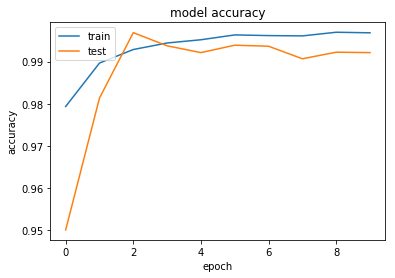

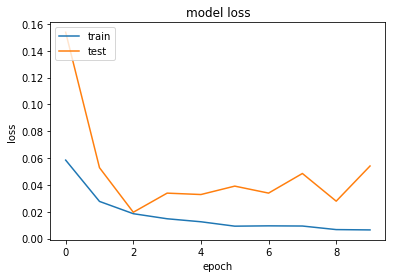

In [19]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

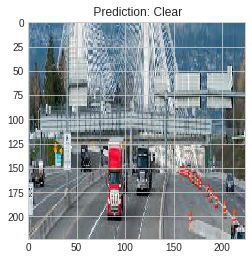

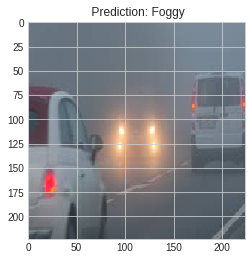

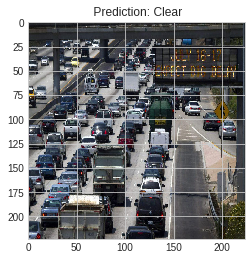

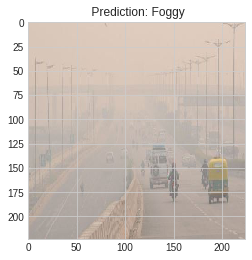

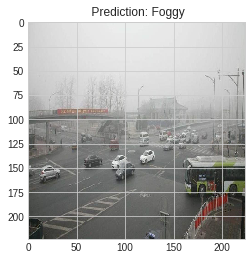

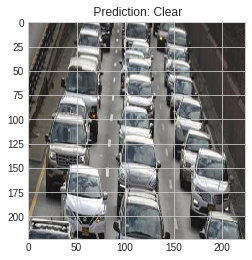

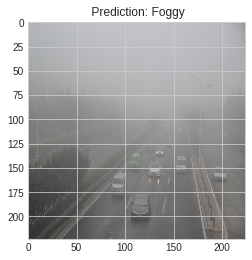

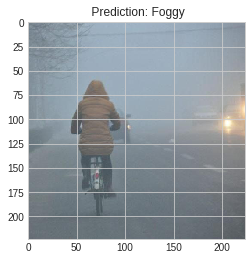

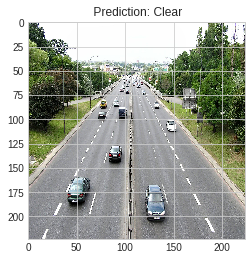

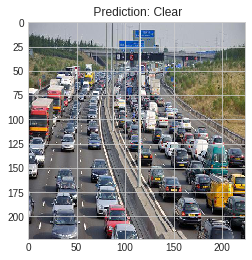

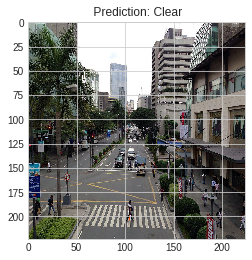

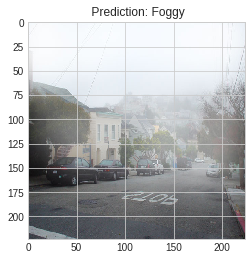

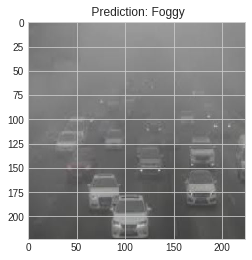

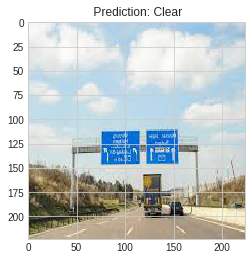

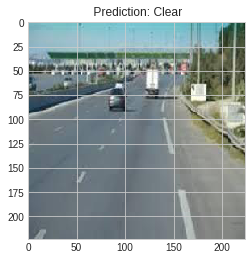

In [29]:
#check some examples

# print(train_set[0][0][0].shape)
plt.style.use('seaborn-whitegrid')
for i in range(15):
    img = test_set[0][0][i]
    img = img.reshape(1, 224, 224, 3)
#     lbl = np.argmax(y_test[i])
    prediction = model.predict(img)
#     print(prediction)
    prediction = np.argmax(prediction)
#     print(prediction, lbl)
    classes = ["Clear", "Foggy"]
    title = f" Prediction: {classes[prediction]}"
    plt.imshow(img.reshape(224, 224, 3))
    plt.title(title)
    plt.show()

In [20]:
#save a model

from keras.models import model_from_json
from keras.models import load_model

print(keras.__version__)

model_json = model.to_json()

with open("model1.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model1.h5")

2.2.4
